In [7]:
# https://sci-hub.se/https://ieeexplore.ieee.org/document/8409768
# Test a thermal face data
import os

root_path=r'F:\UIBE科研\红外成像\数据库\ThermalFaceDatabase'

file_id='irface_sub001_seq02_frm00006.jpg_lfb'

json_path=f'{root_path}/{file_id}.ljson'

image_path=f'{root_path}/{file_id}.png'


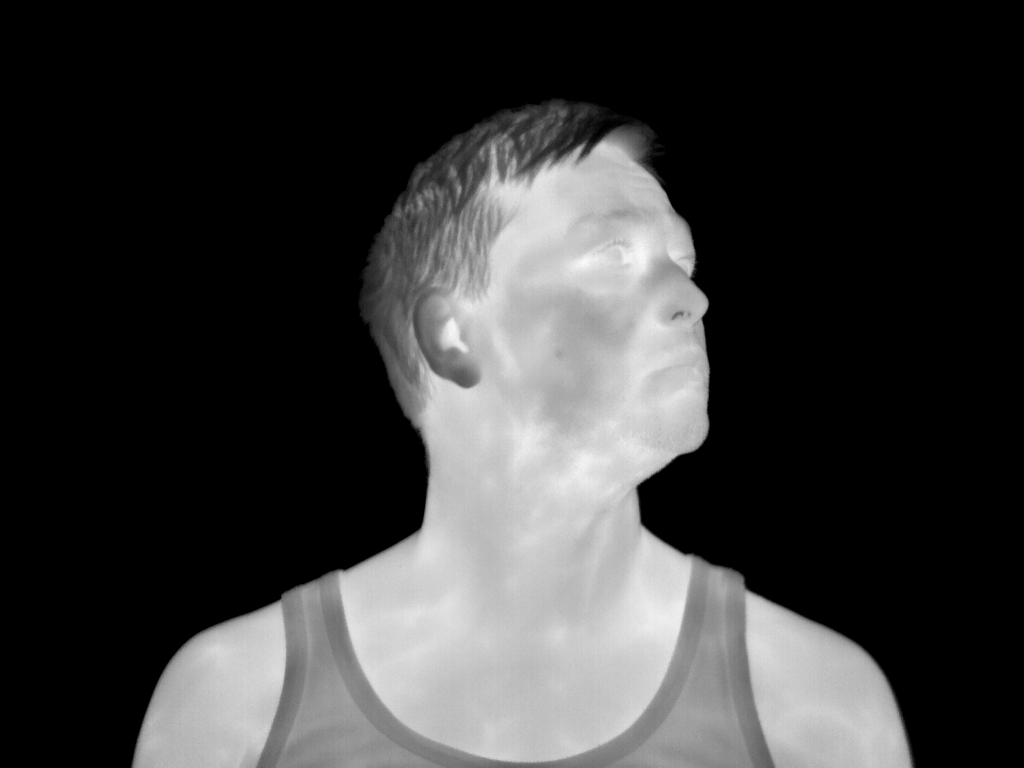

In [8]:
import flyr
from IPython.display import Image, display

display(Image(image_path,width='20%'))



In [9]:
import json
data=json.loads(open(json_path).read())
print(data)

for info in data['labels']:
    print(info)
    label=info['label']
    mask=info['mask']
    print(label,mask)
list_points=[]
for point in data['landmarks']['points']:
    print(point)
    list_points.append(point)
print(len(list_points))



{'labels': [{'label': 'chin', 'mask': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]}, {'label': 'leyebrow', 'mask': [17, 18, 19, 20, 21]}, {'label': 'reyebrow', 'mask': [22, 23, 24, 25, 26]}, {'label': 'centernose', 'mask': [27, 28, 29, 30]}, {'label': 'bottomnose', 'mask': [31, 32, 33, 34, 35]}, {'label': 'leye', 'mask': [36, 37, 38, 39, 40, 41]}, {'label': 'reye', 'mask': [42, 43, 44, 45, 46, 47]}, {'label': 'outermouth', 'mask': [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]}, {'label': 'innermouth', 'mask': [60, 61, 62, 63, 64, 65, 66, 67]}], 'landmarks': {'connectivity': [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 14], [14, 15], [15, 16], [17, 18], [18, 19], [19, 20], [20, 21], [22, 23], [23, 24], [24, 25], [25, 26], [27, 28], [28, 29], [29, 30], [31, 32], [32, 33], [33, 34], [34, 35], [36, 37], [37, 38], [38, 39], [39, 40], [40, 41], [41, 36], [42, 43], [43, 44], [44, 45], [45, 46], [46, 47], 

In [10]:
import os
from quickcsv import *
import shutil
import json 

list_result=[]
for file in os.listdir(root_path):
    file_path=os.path.join(root_path,file)
    filename, ext = os.path.splitext(file)
    if ext==".png":
        json_path=f'{root_path}/{filename}.ljson'
        image_path=f'{root_path}/{filename}.png'
        # shutil.copy(image_path,f'datasets-thermal-face/thermal/{filename}.png')
        data=json.loads(open(json_path).read())
        print(data)

        list_points=[]
        for point in data['landmarks']['points']:
            list_points.append(point)

        for info in data['labels']:
            print(info)
            label=info['label']
            mask=info['mask']
            print(label,mask)

            model={
                'name':filename,
                'mask':';'.join([f'{int(list_points[i][1])},{int(list_points[i][0])}' for i in mask]),
                'label':label
            }
            list_result.append(model)
            # print(model)
write_csv('datasets-thermal-face/list_face_detection.csv',list_result)

{'labels': [{'label': 'chin', 'mask': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]}, {'label': 'leyebrow', 'mask': [17, 18, 19, 20, 21]}, {'label': 'reyebrow', 'mask': [22, 23, 24, 25, 26]}, {'label': 'centernose', 'mask': [27, 28, 29, 30]}, {'label': 'bottomnose', 'mask': [31, 32, 33, 34, 35]}, {'label': 'leye', 'mask': [36, 37, 38, 39, 40, 41]}, {'label': 'reye', 'mask': [42, 43, 44, 45, 46, 47]}, {'label': 'outermouth', 'mask': [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]}, {'label': 'innermouth', 'mask': [60, 61, 62, 63, 64, 65, 66, 67]}], 'landmarks': {'connectivity': [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 14], [14, 15], [15, 16], [17, 18], [18, 19], [19, 20], [20, 21], [22, 23], [23, 24], [24, 25], [25, 26], [27, 28], [28, 29], [29, 30], [31, 32], [32, 33], [33, 34], [34, 35], [36, 37], [37, 38], [38, 39], [39, 40], [40, 41], [41, 36], [42, 43], [43, 44], [44, 45], [45, 46], [46, 47], 

KeyboardInterrupt: 

Read CSV: ['name', 'mask', 'label']  <- (datasets-thermal-face/list_face_detection.csv)
{'name': 'irface_sub058_seq07_frm00686.jpg_lfb', 'mask': '455,446;485,441;509,458;534,448;558,464', 'label': 'bottomnose'}
bottomnose
455 446
485 441
509 458
534 448
558 464


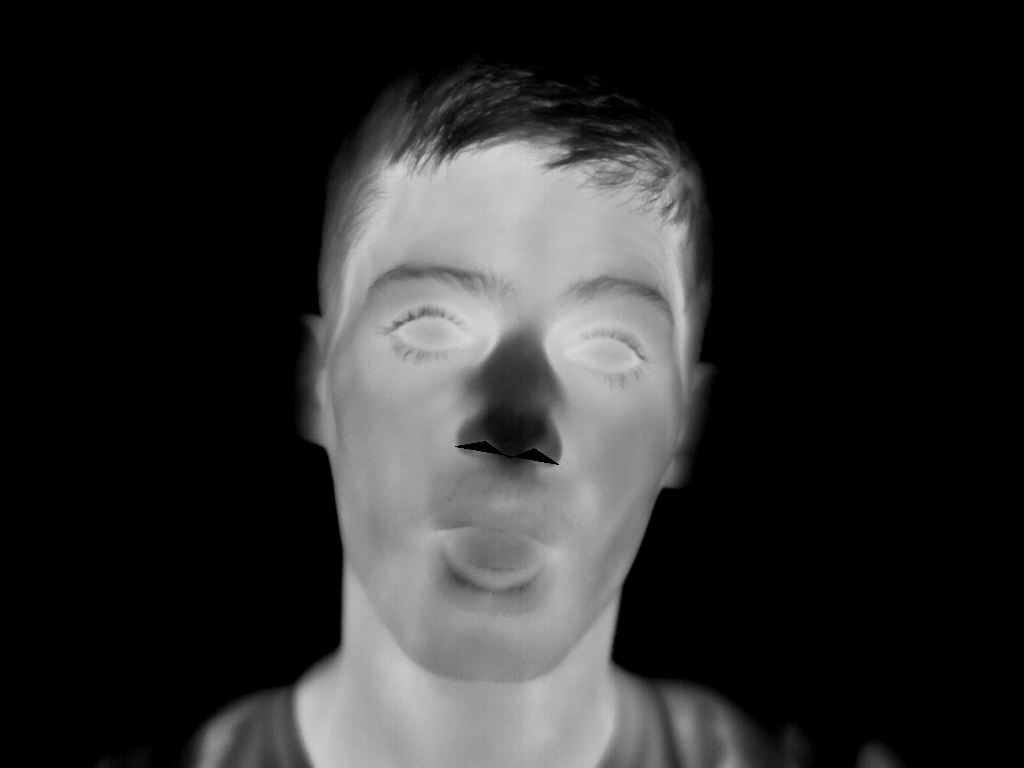

In [11]:

# test if the point are correct
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import random

list_result=read_csv('datasets-thermal-face/list_face_detection.csv')
root_path='datasets-thermal-face/thermal'
thermal_model=random.choice(list_result)

print(thermal_model)

mask=thermal_model['mask']
label=thermal_model['label']
print(label)
list_p=[]
for point in mask.split(";"):
    x=int(point.split(",")[0])
    y=int(point.split(",")[1])
    list_p.append((x,y))
    print(x,y)

image_path=f'{root_path}/{thermal_model["name"]}.png'
image=Image.open(image_path)
image=np.array(image)
# display(image)
points = np.array([list_p], dtype=np.int32)
cv2.fillPoly(image, points, 1)

picture= Image.fromarray(image.astype('uint8')).convert('RGB')
display(picture)


Read CSV: ['name', 'mask', 'label']  <- (datasets-thermal-face/list_face_detection.csv)
{'name': 'irface_sub043_seq07_frm00906.jpg_lfb', 'mask': '462,455;502,469;538,475;572,480;616,476;568,506;531,508;495,495', 'label': 'innermouth'}
innermouth
462 455
502 469
538 475
572 480
616 476
568 506
531 508
495 495


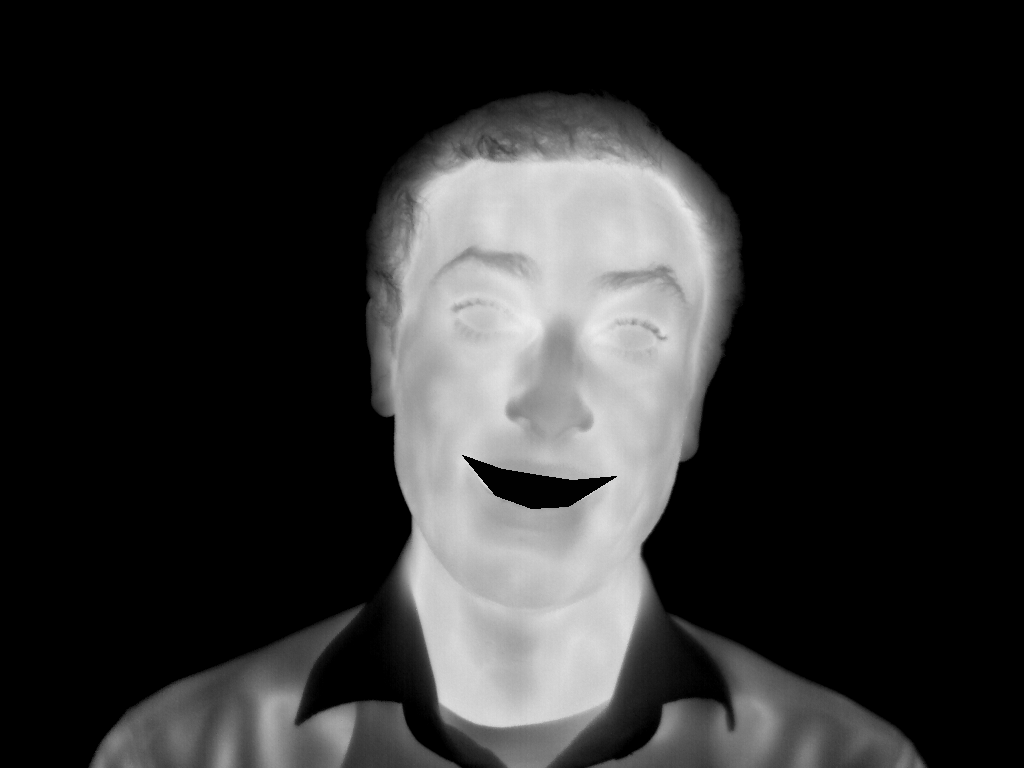

In [13]:

# test if the point are correct using fillpoly
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import random

list_result=read_csv('datasets-thermal-face/list_face_detection.csv')
root_path='datasets-thermal-face/thermal'
thermal_model=random.choice(list_result)

print(thermal_model)

mask=thermal_model['mask']
label=thermal_model['label']
print(label)
list_p=[]
for point in mask.split(";"):
    x=int(point.split(",")[0])
    y=int(point.split(",")[1])
    list_p.append((x,y))
    print(x,y)

image_path=f'{root_path}/{thermal_model["name"]}.png'
image=Image.open(image_path)
image=np.array(image)
# display(image)
points = np.array([list_p], dtype=np.int32)
cv2.fillPoly(image, points, 1)

picture= Image.fromarray(image.astype('uint8')).convert('RGB')
display(picture)


Read CSV: ['name', 'mask', 'label']  <- (datasets-thermal-face/list_face_detection.csv)
363.008 470.489
382.217 452.703
401.425 444.877
427.888 446.166
452.786 444.344
477.076 453.453
496.047 471.201
479.684 488.987
450.514 494.678
422.057 495.390
397.867 493.255
376.525 486.141


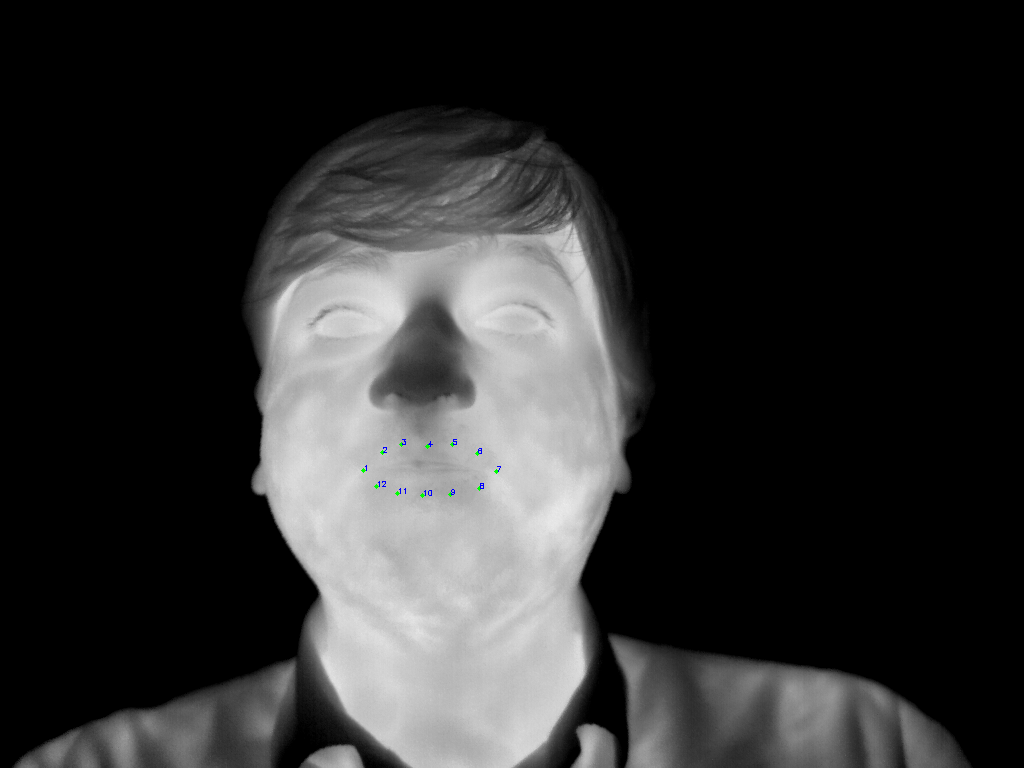

In [99]:

import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

list_result=read_csv('datasets-thermal-face/list_face_detection.csv')
root_path=r'G:\UIBE科研\红外成像\数据库\ThermalFaceDatabase'

thermal_model=random.choice(list_result)

image = cv2.imread(f'datasets-thermal-face/thermal/{thermal_model["name"]}.png',1)  # 1 彩色，0 灰色

# test n points
pts_file=f'{root_path}/{thermal_model["name"]}.pts'

# 读取对应的pts文件
with open(pts_file) as file_obj:
    contents = file_obj.readlines();
 
i = 0
landmarks = []
for line in contents:
    TT = line.strip("\n")  # strip() 方法用于移除字符串头尾指定的字符（默认为空格或换行符）或字符序列。
    if i > 2 and i < 15:
        print(TT)
        TT_temp = TT.split(" ")
        x = float(TT_temp[0])
        y = float(TT_temp[1].strip("\r"))  # \r :回车
        landmarks.append((x, y))
    i += 1

m = 0  # 标号初始为0
for point in landmarks:
    # print(point[0],point[1])
    cv2.circle(image, (int(point[0]), int(point[1])), 2, (0, 255, 0), -1)  # 颜色顺序：BGR (0, 255, 0)绿色,-1 实心圆
    m += 1
    cv2.putText(image, str(m), (int(point[0]), int(point[1])), cv2.FONT_HERSHEY_SIMPLEX, 0.25, (0, 0, 255),
                1)  # 每个关键点上标号
#     plt.scatter(np.transpose(point)[0], np.transpose(point)[1])  # 散点图
# plt.show()
picture= Image.fromarray(image.astype('uint8')).convert('RGB')
display(picture)




In [ ]:
# Convert image data to n x n
import os

from PIL import Image
from tqdm import tqdm

deta_x=int((1024-768)*1.0/2)

def crop_image_optical(image_path,save_path=None):
    #cropping images
    img = Image.open(image_path) ## 打开chess.png文件，并赋值给img
    region = img.crop((deta_x,0,768+deta_x,768)) ## 0,0表示要裁剪的位置的左上角坐标，50,50表示右下角。
    # region = region.resize((1080,1440))
    # region_resized=region.resize((64,64))
    # cropped_image=crop_image(optical_path)
    if save_path!=None:
        region.save(save_path)
    return region

root_path=r'F:\UIBE科研\红外成像\InfraData\datasets-thermal-face\thermal'
saved_root_path=r'F:\UIBE科研\红外成像\InfraData\datasets-thermal-face\thermal_sq'

for file in tqdm(os.listdir(root_path)):
    image_path=os.path.join(root_path,file)
    save_path=f'{saved_root_path}/{file}'
    crop_image_optical(image_path,save_path)


In [ ]:
import os
import flyr
from IPython.display import Image, display

saved_root_path=r'datasets-thermal-face/thermal_sq'

file_id='irface_sub001_seq02_frm00006.jpg_lfb.png'

image_path=os.path.join(saved_root_path,file_id)

if not os.path.exists(image_path):
    raise Exception("error file!")

import cv2
import csv
from PIL import Image
from quickcsv.file import *

def write_thermal(thermal,saved_path):
    f_out=open(saved_path,'w',encoding='utf-8')
    for m in thermal:
        line=[]
        for l in m:
            line.append(str(l))
        f_out.write(','.join(line)+'\n')
    f_out.close()

img = cv2.imread(image_path, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)

# cv2.imshow('title',img)
print(img[10,10])
# print(img)

# Get image dimensions
height, width = img.shape
print(img.shape)
# Loop through each pixel and get the pixel values

color = cv2.applyColorMap(img, cv2.COLORMAP_JET) 
color1= Image.fromarray(color.astype('uint8')).convert('RGB')
display(color1)

max_value=-1
min_value=1000

for y in range(height):
    for x in range(width):
        pixel = img[y, x]
        if pixel > max_value:
            max_value=pixel
        if pixel < min_value:
            min_value=pixel
print(min_value,max_value)

temps=[]
for y in range(height):
    list_t=[]
    for x in range(width):
        pixel = img[y, x]
        temp=22+(pixel-min_value)/(max_value-min_value)
        list_t.append(round(temp,4))
    temps.append(list_t)

print(temps)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc= {"figure.figsize": (6, 6)})

ax = sns.heatmap(temps,
                  xticklabels=False,  # remove the labels
                  yticklabels=False,
                  cbar=False,
                  cmap='inferno'
                  )


plt.tight_layout()

# plt.show()
plt.savefig('datasets/test_data/test5.jpg', dpi=300, bbox_inches='tight', pad_inches=0)

write_thermal(temps,saved_path='datasets/test_data/test6.csv')


100%|██████████| 2935/2935 [3:35:26<00:00,  4.40s/it]  


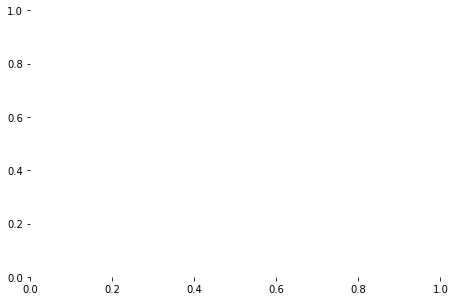

In [4]:
# Convert image data to n x n
import os
import cv2
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

deta_x=int((1024-768)*1.0/2)

def resize_image(image_path,save_path=None):
    #cropping images
    img = Image.open(image_path) ## 打开chess.png文件，并赋值给img
    # region = img.crop((deta_x,0,768+deta_x,768)) ## 0,0表示要裁剪的位置的左上角坐标，50,50表示右下角。
    region = img.resize((128,128))
    # region_resized=region.resize((64,64))
    # cropped_image=crop_image(optical_path)
    if save_path!=None:
        region.save(save_path)
    return region

def write_thermal(thermal,saved_path):
    f_out=open(saved_path,'w',encoding='utf-8')
    for m in thermal:
        line=[]
        for l in m:
            line.append(str(l))
        f_out.write(','.join(line)+'\n')
    f_out.close()

def generate_infrared_img(image_path,infrared_path,csv_path):
    img = cv2.imread(image_path, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)

    # cv2.imshow('title',img)
    # print(img[10,10])
    # print(img)

    # Get image dimensions
    height, width = img.shape
    # print(img.shape)
    # Loop through each pixel and get the pixel values

    # color = cv2.applyColorMap(img, cv2.COLORMAP_JET) 
    # color1= Image.fromarray(color.astype('uint8')).convert('RGB')
    # display(color1)

    max_value=255
    min_value=0
    '''
    for y in range(height):
        for x in range(width):
            pixel = img[y, x]
            if pixel > max_value:
                max_value=pixel
            if pixel < min_value:
                min_value=pixel
    # print(min_value,max_value)
    '''
    temps=[]
    for y in range(height):
        list_t=[]
        for x in range(width):
            pixel = img[y, x]
            temp=(pixel-min_value)/(max_value-min_value)
            temp=round(temp,3)
            if str(temp).split('.')[1]=='0':
                list_t.append(int(temp))
            else:
                list_t.append(round(temp,3))
        temps.append(list_t)

    # print(temps)

    # sns.set(rc= {"figure.figsize": (6, 6)})

    ax = sns.heatmap(temps,
                    xticklabels=False,  # remove the labels
                    yticklabels=False,
                    cbar=False,
                    cmap='inferno'
                    )

    plt.tight_layout()
    

    # plt.show()
    plt.savefig(infrared_path, dpi=300, bbox_inches='tight', pad_inches=0)
    plt.cla()
    
    # write_thermal(temps,saved_path=csv_path)

root_path=r'datasets-thermal-face/thermal_sq'
saved_root_path=r'datasets-thermal-face/thermal_128'
csv_root_path=r'datasets-thermal-face/csv'

for file in tqdm(os.listdir(root_path)):
    image_path=os.path.join(root_path,file)
    save_path=f'{saved_root_path}/{file}'
    if os.path.exists(save_path):
        continue
    csv_path=f'{csv_root_path}/{file.replace(".png",".csv")}'
    generate_infrared_img(image_path,infrared_path=save_path,csv_path=csv_path)
    resize_image(save_path,save_path)
    
    


In [94]:
# convert csv file to 128x128
from quickcsv.file import *
deta_x=int((1024-768)*1.0/2)
DIM=128
list_item = read_csv('datasets-thermal-face/list_face_detection.csv')

for idx, item in enumerate(tqdm(list_item)):
    list_p=[]
    for p in list_item[idx]['mask'].split(';'):
        pv=p.split(',')
        x=int(pv[0])
        y=int(pv[1])
        ratio=DIM*1.0/768
        x=int((x-deta_x)*ratio)
        y=int(y*ratio)
        list_p.append(f'{x},{y}')
    lp=';'.join(list_p)
    list_item[idx]['mask']=lp

write_csv(f'datasets-thermal-face/list_face_detection_{DIM}.csv',list_item)
        

Read CSV: ['name', 'mask', 'label']  <- (datasets-thermal-face/list_face_detection.csv)


100%|██████████| 26415/26415 [00:00<00:00, 111762.30it/s]


Write CSV: ['name', 'mask', 'label']  -> (datasets-thermal-face/list_face_detection_128.csv)


Read CSV: ['name', 'mask', 'label']  <- (datasets-thermal-face/list_face_detection_128.csv)
outermouth


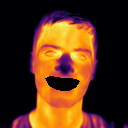

In [95]:
# test an image after resizing the image
# test if the point are correct

import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import random

list_result = read_csv('datasets-thermal-face/list_face_detection_128.csv')

thermal_model=random.choice(list_result)
root_path='datasets-thermal-face/thermal_128'
mask=thermal_model['mask']
label=thermal_model['label']
print(label)
list_p=[]
for point in mask.split(";"):
    x=int(point.split(",")[0])
    y=int(point.split(",")[1])
    list_p.append((x,y))

image_path=f'{root_path}/{thermal_model["name"]}.png'
image=Image.open(image_path)
image=np.array(image)
# display(image)
points = np.array([list_p], dtype=np.int32)
cv2.fillPoly(image, points, 1)

picture= Image.fromarray(image.astype('uint8')).convert('RGB')
display(picture)




In [4]:
# merge datasets for multiple labels for one image
from quickcsv.file import *
list_item = read_csv('datasets-thermal-face/list_face_detection_128.csv')

dict_name={}
for item in list_item:
    name=item['name']
    if name in dict_name:
        dict_name[name].append(item)
    else:
        dict_name[name]=[item]


list_model=[]
for name in dict_name.keys():
    list_v=[]
    list_l=[]
    for item in dict_name[name]:
        list_v.append(item['mask'])
        list_l.append(item['label'])
    
    model={
        'name':name,
        'masks':'|'.join(list_v),
        'labels':'|'.join(list_l)
    }
    list_model.append(model)
write_csv('datasets-thermal-face/list_face_detection_128_merged.csv',list_model)



Read CSV: ['name', 'mask', 'label']  <- (datasets-thermal-face/list_face_detection_128.csv)
Write CSV: ['name', 'masks', 'labels']  -> (datasets-thermal-face/list_face_detection_128_merged.csv)
